### Take in the fits file and create a pupil to feed into FT_model code

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import math
from FT_model import model_FT

In [3]:
fname = "pupil0.fits"
hdul = fits.open(fname)
array = hdul[0].data

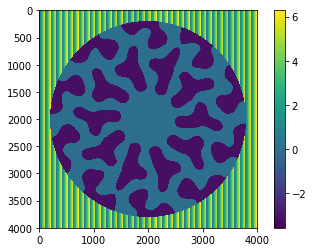

In [4]:
plt.imshow(array)
plt.colorbar()
plt.show()

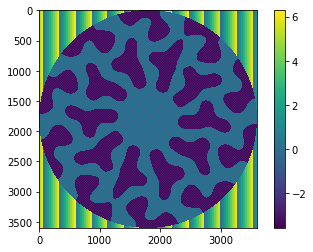

In [5]:
gridsize = array.shape[0]
c = gridsize//2
size = 3600
plt.imshow(array[int(c-size//2):int(c+size//2),int(c-size//2):int(c+size//2)])
plt.colorbar()
plt.show()

In [6]:
im = array[int(c-size//2):int(c+size//2),int(c-size//2):int(c+size//2)]

In [7]:
gridsize = im.shape[0]
c = gridsize//2
pupil = np.zeros(im.shape, dtype=complex)
vals = []

white = np.complex(1,0)
black = -np.complex(1,0)

for i in range(gridsize):
    for j in range(gridsize):
        x = i - c
        y = j - c 
        r = math.hypot(x, y)
        if r >= gridsize//2:
            pupil[i][j] = np.complex(0,0)
        else:
#             pupil[i][j] = black if np.abs(np.angle(im[i][j])) > 3*np.pi/4 else white
            pupil[i][j] = np.exp(1j*im[i][j])

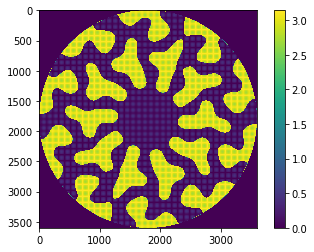

In [8]:
plt.imshow(np.abs(np.angle(pupil)))
plt.colorbar()
plt.show()

In [9]:
aperture = 0.018                 # Aperture (m)
gridsize = 3600                  # Gridsize of the wavefront array
npixels = 1024                   # Size of detector, in pixels
wl = 0.525e-6                    # Wavelength values (micrometers)
fl = 0.15                        # Focal length (m)
detector_pitch = 1.12e-6         # m/pixel on detector (pixel spacing)

im_out = model_FT(pupil, aperture, npixels, [wl], fl, detector_pitch)

(3600, 3600)


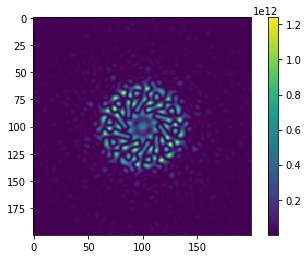

In [10]:
gridsize = im_out.shape[0]
c = gridsize//2
size = 200

plt.imshow(im_out[int(c-size//2):int(c+size//2),int(c-size//2):int(c+size//2)])
plt.colorbar()
plt.show()

### Take this image and use it to feed into code to calculate total power contained within some radii

$
\lambda = 525nm \\
Diameter = 0.018m \\
Focal\ length = 0.15m \\
Pixel\ size = 1.12\mu m 
$

In [11]:
lam = 525e-9
D = 0.018
fl = 0.15
pix_size = 1.12e-6

In [12]:
num_fringes = 10
physical_radius = fl*math.tan(num_fringes*lam/D)
num_pixels = physical_radius/pix_size
print(num_pixels)

39.0625011076751


In [13]:
inner = 0
outer = 0

for i in range(gridsize):
    for j in range(gridsize):
        x = i - c
        y = j - c 
        r = math.hypot(x, y)
        if r >= num_pixels:
            outer += im_out[i][j]
        else:
            inner += im_out[i][j]

69.03% of total energy contained within a 10 lambda/D radius
30.97% of total energy contained outside a 10 lambda/D radius


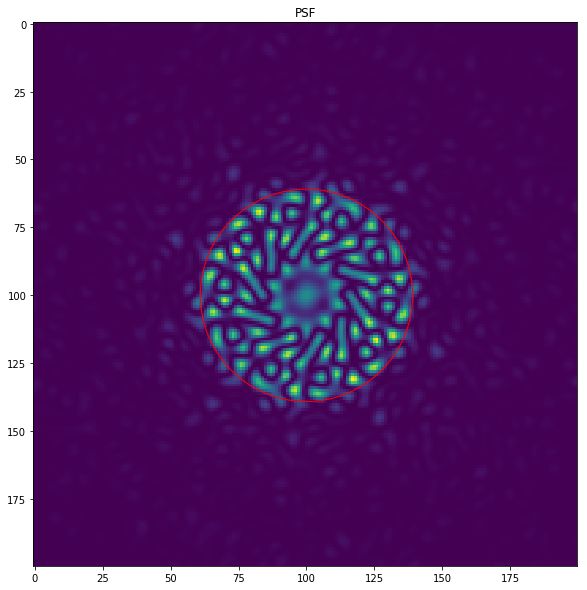

In [14]:
inner_percentage = inner/np.sum(im_out)
outer_percentage = outer/np.sum(im_out)
print("{:.2f}% of total energy contained within a {} lambda/D radius".format(inner_percentage*100, num_fringes))
print("{:.2f}% of total energy contained outside a {} lambda/D radius".format(outer_percentage*100, num_fringes))

gridsize = im_out.shape[0]
c = gridsize//2
size = 200
d = size//2
fsize = (10,10)

fig, axs = plt.subplots(1, 1, figsize=fsize)
ax = axs
ax.set_title("PSF")
im = ax.imshow(im_out[int(c-size//2):int(c+size//2),int(c-size//2):int(c+size//2)])

circle = plt.Circle((d, d), num_pixels, color='r', fill=False) # ~ 6lam/D
ax.add_artist(circle)
plt.show()